Optimization terminated successfully.
         Current function value: 7215.496409
         Iterations: 17
         Function evaluations: 26
         Gradient evaluations: 26


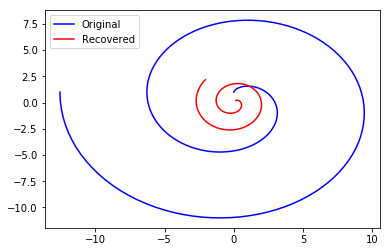

In [3]:
import scipy as sp
import scipy.optimize as opt
from numpy import log
from numpy.linalg import det, inv
import numpy as np
from math import pi
import matplotlib.pyplot as plt

def f_non_lin(x):
    val = np.ndarray((len(x), 2))
    val[:,0] = np.sin(x)- x*np.cos(x)
    val[:,1] = np.cos(x)+ x*np.sin(x)
    return val

def f_lin(x, A):
    val = np.dot(x, A.T)
    return val
    
def gradient(w, *args):
    S, sigma = args
    W = w.reshape(D, W_dim)
    C = W.dot(W.T) + (sigma**2 * np.eye(W.shape[0])) 
    val = -N * (inv(C).dot(S).dot(inv(C)).dot(W) - inv(C).dot(W))
    return val.reshape(-1)

def cost_function(w, *args):
    S, sigma = args
    W = w.reshape(D, W_dim)
    C = W.dot(W.T) + (sigma**2 * np.eye(W.shape[0]))
    
    #bishop 12.44
    cost = N/2 * (D * np.log(2 * pi) + np.log(det(C)) + np.trace(inv(C).dot(S)))
    return cost

D = 10
W_dim = 2
x0 = np.random.rand(D, W_dim) # initial weights

N = 200
x = np.linspace(0, 4*pi, N) # data
N = float(N)

mu = np.zeros(D) 
A = np.random.normal(0, 1, (10, 2)) # A = 10x2
Y = f_lin(f_non_lin(x), A) # 200x10

S = 1./N * (Y - mu).T.dot(Y - mu)
sigma = 12
x_star = opt.fmin_cg(cost_function, x0, fprime=gradient, maxiter=100, args=(S, sigma))
fnonlin = f_non_lin(x)
plt.plot(fnonlin[:,0], fnonlin[:,1], 'b', label='Original')

W = x_star.reshape(D, W_dim) # 10x2
# least squares
#(X^TX)^-1 X^T y
X = np.linalg.pinv(W.T.dot(W)).dot(W.T).dot((Y - mu).T).T
plt.plot(X[:,0],X[:,1], 'r-', label='Recovered')
plt.legend()
plt.savefig('representation2.eps', bbox_inches='tight')
plt.show()

In [162]:
A = np.random.randn(20)
A = A.reshape((2,10))
Wstar = opt.fmin_cg(f,A, fprime=df)
W=np.transpose(Wstar)
WtW = np.dot(np.transpose(W),W)
X = np.dot(np.dot(Y,W), np.dot(W,WtW))
plt.scatter(X[:,0],X[:,1])
plt.show()

         Current function value: 13490.364985
         Iterations: 0
         Function evaluations: 100
         Gradient evaluations: 88


ValueError: shapes (10,200) and (20,) not aligned: 200 (dim 1) != 20 (dim 0)

In [148]:
print(np.shape(Y))

(10, 200)


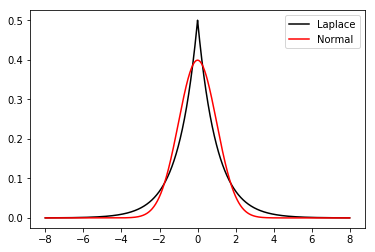

In [96]:
from scipy.stats import laplace
from scipy.stats import norm
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

loc, scale = 0., 1.
s = np.random.laplace(loc, scale, 1000)


x = np.arange(-8., 8., .01)
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
line1, = plt.plot(x, pdf,'k-', label="Laplace")
g = (1/(scale * np.sqrt(2 * np.pi)) * np.exp(-(x - loc)**2 / (2 * scale**2)))
line2, = plt.plot(x,g,'r-', label="Normal")
plt.legend()
plt.savefig('Place.eps', bbox_inches='tight')
plt.show()